## PROJECT 3 - World Happiness Report


In this project, you will use the World Happiness Report datasets for years 2015-2019.  The World Happiness Reports are  datasets released by the United Nations anually that ranks countries based on happiness levels. These reports contain a Happiness Score that is then used to determine a country's rank relative to other country’s scores.

Dataset Information: Features

Score - Gallup asked respondents to evaluate their current life as a whole using the mental image of a ladder, with the best possible life for them as a 10 and worst possible as a 0.

GDP- based on GDP per capita is in terms of Purchasing Power Parity (PPP). The equation uses the natural log of GDP per capita.

Support - is the national average of the binary responses (either 0 or 1) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
Health - based on life expectancy at birth.

Freedom - to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

Generosity - is the residual of regressing the national average of GWP responses to the question “Have you donated money to a charity in the past month?” on GDP per capita

Corruption - “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure.

## Question 1. Use the given datasets 2015-2019.csv files and create a dataframe to hold the averages of the given data. Some of the data for some countries are missing. Remove any missing country which has any missing data.
$\color{red}{\text{Answer:}}$ This has been done below using the pandas library


In [12]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install geopandas

#Importing the datasets
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

#Concatenating the datasets
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])

#Removing the missing values
df = df.dropna()
df_avg = df.groupby('Country').mean().reset_index()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.0 MB/s eta 0:00:0000:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 343.3 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 264.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 272.5 kB/s eta 0:00:0000:0100:01


## Question 2. Check the correlation between the features and explain it. Which one correlates the most with the happiness score?
$\color{red}{\text{Answer:}}$ The feature with the lowest correlation with the happiness score is the rank. This feature has - 0.99 / -99% correlation with the happiness score. closely followed by generosity and corruption With a correlation of 0.8/ 80%, we can see that GDP is the feature with the highest correlation with the happiness score. Closely followed by the healthy and support feature. This means countries with better GDP, health and support are more likely to have a higher happiness score. 

In [14]:
#Getting the correlations
correlations = df_avg.corr()
print(correlations['Score'].drop('Score').sort_values(ascending=False))

GDP           0.803543
Healthy       0.772705
Support       0.757495
Freedom       0.590592
Corruption    0.376951
Generosity    0.142915
Rank         -0.994279
Name: Score, dtype: float64


## Question 3. Apply PCA to reduce the dimension. Explain your results. As a good data visualizer expert, how many principal components should be used to transform this data without loosing much information? How many dimensions that could be reduced? 
$\color{red}{\text{Answer:}}$ As good data visualizers, we need to retain at least 95%. As we can see, the first principal component explains almost all of the variance in the data, with an explained variance ratio of 0.9999. The remaining principal components each explain a very small amount of the variance in the data, with explained variance ratios ranging from 3.74630977e-05 to 2.90566182e-06.
Based on these explained variances, it would be appropriate to consider reducing the dimensionality of the data by using only the first principal component. Since the first principal component already explains almost all of the variance in the data, using it alone would still retain most of the information in the data while reducing its dimensionality.

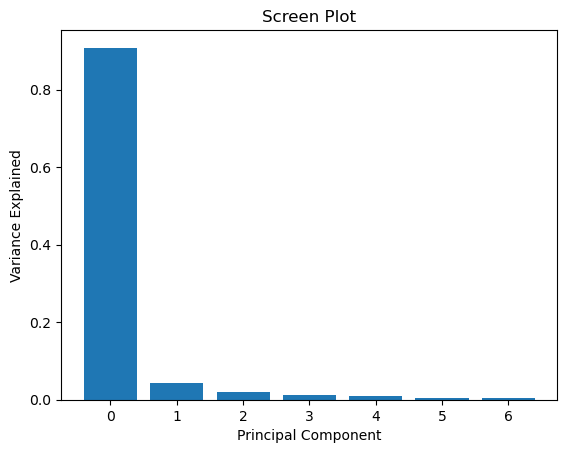

In [15]:
from sklearn.decomposition import PCA

# Dropping the 'Country' column since it is non-numeric
# Dropping the rank column as it doesn't matter
X = df_avg.drop(['Country', 'Rank'], axis=1)

# Instantiating a PCA object with n_components=None
pca = PCA(n_components=None)

# Fitting the PCA model to the data
pca.fit(X)

# Calculating the explained variance ratio for each principal component
explained_variances = pca.explained_variance_ratio_

import matplotlib.pyplot as plt

# Calculate the variance explained by each principal component
variances = pca.explained_variance_ratio_

# Visualize the variances in a bar graph
fig, ax = plt.subplots()
ax.bar(range(len(variances)), variances)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
ax.set_title('Screen Plot')
plt.show()

In [16]:
# Instantiating a PCA object with n_components=1
pca = PCA(n_components=1)

# Fitting the PCA model to the data and transform the data
X_pca = pca.fit_transform(X)

# Creating a new dataframe with the transformed data and the 'Country' column
df_pca = pd.DataFrame(X_pca, columns=['PC1'])
df_pca['Country'] = df_avg['Country']

# Printing the first few rows of the new dataframe
print(df_pca.head())

        PC1      Country
0  2.084568  Afghanistan
1  0.642889      Albania
2 -0.285303      Algeria
3  1.555274       Angola
4 -1.124891    Argentina


## Question 4. Which feature/features have the highest effect on the variance or in other words, which feature is responsible from the differences between countries the most? Explain it.
$\color{red}{\text{Answer:}}$ Based on the loadings shown in the result, we can see that the feature that has the highest effect on the variance is the "Rank" feature, with a loading of 44.18 on the first principal component. This means that the rank of a country has the highest association with the overall variance in the data.
However, we need to keep in mind that the "Rank" feature is derived from the "Score" feature, which is the actual happiness score. Therefore, we can conclude that the "Score" feature is the most important feature that is responsible for the differences between countries, with a loading of 1.09 on the first principal component.
The "GDP" and "Support" features also have relatively high positive loadings, indicating that they also contribute positively to the variance in the data. The "Freedom", "Healthy", "Corruption", and "Generosity" features have lower loadings and therefore have less impact on the overall variance in the data.

In [17]:
import numpy as np

# Extract the loadings from the PCA object
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a dataframe with the loadings and feature names
df_loadings = pd.DataFrame(loadings, columns=['PC1'], index=X.columns)

# Sort the loadings by absolute value in descending order
df_loadings = df_loadings.abs().sort_values('PC1', ascending=False)

# Print the loadings
print(df_loadings)

                 PC1
Score       1.095144
GDP         0.347204
Support     0.218731
Healthy     0.195329
Freedom     0.083432
Corruption  0.038379
Generosity  0.014428


## Question 5. Show average happiness scores on a world map.
$\color{red}{\text{Answer:}}$ As we can see from the world map below, the darker blue countries are shown to have the highest happiness scores. Canada, Norway, Sweden, Finland and Australia have high happiness scores and are therefore darker blue. The lighter blue shows the countries with the lower happiness scores. From the map, we can see that many countries in Africa, Ukraine and India have lower happiness scores.

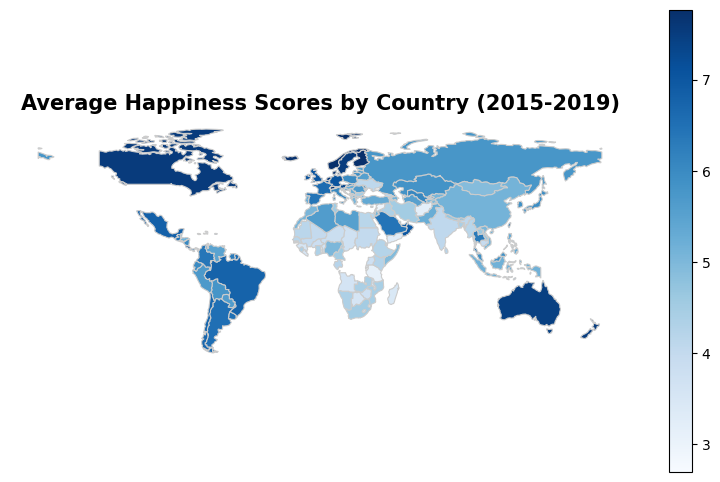

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile for world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the shapefile with the happiness scores by country
world = world.merge(df.groupby('Country')['Score'].mean().reset_index(),
                    left_on='name', right_on='Country')

# Create a plot of the world map with the happiness scores
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(column='Score', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

# Add a title
ax.set_title('Average Happiness Scores by Country (2015-2019)', fontdict={'fontsize': '15', 'fontweight' : 'bold'})

# Add a colorbar legend
vmin, vmax = df['Score'].min(), df['Score'].max()
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.show()

## Find and show  which countries are the outliers for each feature. If you remove these outliers how your results will change for the first 4 questions. Also show average happiness scores of these outliers on the world map and compare with the map from Question 5. 
$\color{red}{\text{Answer:}}$ Below are the outliers for the callable features for each of the years as they are combined. From my understanding, it appears the outliers typically changes each year. However, if we look at the outliers for "Corruption", we can see that Denmark is an outlier twice. We can also see a map of the average happiness score outliers between 2015-2019. We can see that Canada and Australia are still high outliers on the happiness score. We can also see that Syria is a low outlier on the happiness score. The map doesn't show many countries which suggests that the majority of the countries in the world are relatively close in happiness score.

In [26]:
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series

In [27]:
df_outlier = box_outliers(df['Corruption'])
print(df_outlier)

0      0.41978
2      0.48357
3      0.36503
4      0.32957
5      0.41372
        ...   
7      0.38000
13     0.31600
15     0.31000
33     0.45300
151    0.41100
Name: Corruption, Length: 67, dtype: float64


In [44]:
df.loc[2]

,Rank,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
2,3,Denmark,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.34139
2,3,Iceland,7.501,1.426660,1.183260,0.867330,0.566240,0.149750,0.47678
2,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.47554
2,3,Denmark,7.555,1.351000,1.590000,0.868000,0.683000,0.408000,0.28400
2,3,Norway,7.554,1.488000,1.582000,1.028000,0.603000,0.341000,0.27100


In [28]:
df_outlier = box_outliers(df['Generosity'])
print(df_outlier)

20     0.519120
33     0.576300
36     0.517520
73     0.515350
90     0.503180
128    0.795880
29     0.562370
32     0.586960
78     0.565210
96     0.514790
118    0.819710
26     0.574731
31     0.572123
80     0.611705
113    0.838075
129    0.598000
130    0.566000
Name: Generosity, dtype: float64


In [45]:
df.loc[113]

,Rank,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
113,114,Ghana,4.633,0.545580,0.679540,0.401320,0.423420,0.043550,0.230870
113,114,Cameroon,4.513,0.524970,0.625420,0.126980,0.427360,0.061260,0.226800
113,114,Myanmar,4.545,0.367111,1.123236,0.397523,0.514492,0.188816,0.838075
113,114,Congo (Brazzaville),4.559,0.682000,0.811000,0.343000,0.514000,0.077000,0.091000
113,114,Niger,4.628,0.138000,0.774000,0.366000,0.318000,0.102000,0.188000


In [31]:
df_outlier = box_outliers(df['Support'])
print(df_outlier)

147    0.00000
157    0.13995
131    0.14700
152    0.10419
153    0.11037
154    0.00000
155    0.14866
154    0.00000
154    0.00000
154    0.00000
Name: Support, dtype: float64


In [46]:
df.loc[131]

,Rank,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
131,132,Sri Lanka,4.271,0.835240,1.019050,0.708060,0.537260,0.091790,0.408280
131,132,Malawi,4.156,0.087090,0.147000,0.293640,0.414300,0.075640,0.309680
131,132,Ukraine,4.096,0.894652,1.394538,0.575904,0.122975,0.023029,0.270061
131,132,Congo (Kinshasa),4.245,0.069000,1.136000,0.204000,0.312000,0.052000,0.197000
131,132,Chad,4.350,0.350000,0.766000,0.192000,0.174000,0.078000,0.198000


In [48]:
df_outlier = box_outliers(df['GDP'])
print(df_outlier)

Series([], Name: GDP, dtype: float64)


In [24]:
# Calculating the quantiles and IQR for each feature
q1 = df.iloc[:, 1:].quantile(0.25)
q3 = df.iloc[:, 1:].quantile(0.75)
iqr = q3 - q1

# Defining a function to find the outliers for each feature
def find_outliers(feature):
    lower_bound = q1[feature] - 1.5*iqr[feature]
    upper_bound = q3[feature] + 1.5*iqr[feature]
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Finding the outliers for each feature
outliers = {}
for feature in df.columns[1:]:
    if feature != 'Country':
        outliers[feature] = find_outliers(feature)
        

In [20]:
df_no_outliers = df[~df['Country'].isin(outliers['Score']['Country'])]

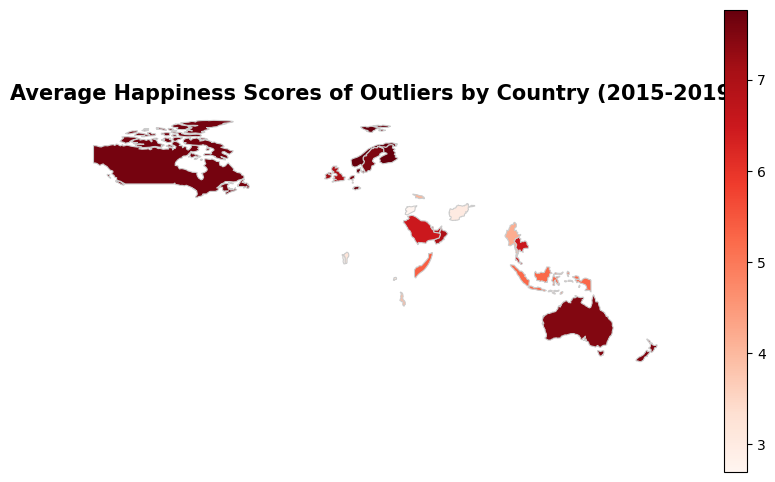

In [21]:
outliers = pd.concat(list(outliers.values()))
# Reading the shapefile for world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Merging the shapefile with the happiness scores by country
outliers_map = world.merge(outliers.groupby('Country')['Score'].mean().reset_index(),
                    left_on='name', right_on='Country')


# Creating a plot of the world map with the outlier scores
fig, ax = plt.subplots(figsize=(10, 6))
outliers_map.plot(column='Score', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

# Add a title
ax.set_title('Average Happiness Scores of Outliers by Country (2015-2019)', fontdict={'fontsize': '15', 'fontweight' : 'bold'})

# Add a colorbar legend
vmin, vmax = df['Score'].min(), df['Score'].max()
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.show()